# 1. File upload


In [1]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
!ls -al

total 1480
drwxr-xr-x 1 root root   4096 Jan  6 08:16 .
drwxr-xr-x 1 root root   4096 Jan  6 08:14 ..
drwxr-xr-x 4 root root   4096 Dec 23 14:32 .config
-rw-r--r-- 1 root root 601661 Jan  6 08:15 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root 676709 Jan  6 08:16 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root   9532 Jan  6 08:16 obama_01.jpeg
-rw-r--r-- 1 root root   5172 Jan  6 08:16 obama_02.jpeg
-rw-r--r-- 1 root root 194499 Jan  6 08:16 obama_03.jpg
drwxr-xr-x 1 root root   4096 Dec 23 14:32 sample_data


# 2. Load file

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [53]:
file_name = 'obama_03.jpg'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [54]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [55]:
#-- 1. Load the cascade
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eye cascade')
    exti(0)

In [79]:
img = cv2.imread(file_name)

In [80]:
ratio = 1/5
height, width = img.shape[:2]
img = cv2.resize(img, (int(width*ratio),int(height*ratio)))

In [81]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray) # eaulize a histogram

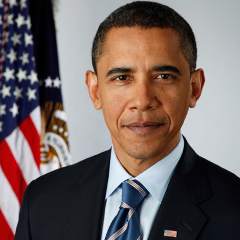

In [82]:
cv2_imshow(img)

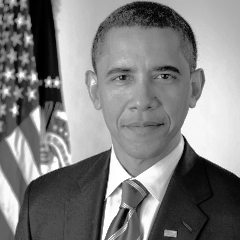

In [83]:
cv2_imshow(gray)

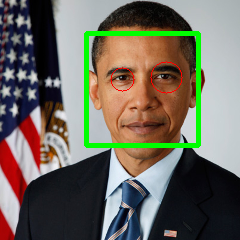

In [84]:
# find faces using cascade 
faces = face_cascade.detectMultiScale(gray)
# faces: [[x,y,w,h],...[x,y,w,h]]
for (x,y,w,h) in faces:
    # center = (x+w//2, y+h//2)
    img = cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),3)
    # Region Of Interest - face
    faceROI = gray[y:y+h,x:x+w]
    # find eyes in the faceROI
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
        # origin point = (x,y)
        eye_center = (x+x2+w2//2, y+y2+h2//2)
        radius = int(round(w2+h2)/4)
        img = cv2.circle(img, eye_center, radius ,(0,0,255),1)
cv2_imshow(img)